# EDA Assignment for House Prices in King County, Seattle, USA
By Monali Talele

## Importing packages required
Common packages such as pandas, numpy, matplotlib and seaborn are needed for EDA.
I have used folium for showing houses on map. I also have used math fuctions for calculating distance of houses to golf course.

In [1052]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Marker, Icon
from math import radians, sin, cos, sqrt, atan2


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (10, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Getting data and describing it

In [1053]:
df = pd.read_csv("data/eda.csv")
df.shape

(21597, 23)

In [1054]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [1055]:
pd.set_option('display.max_columns', 25)  
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


## Cleaning Data : fixing data types, fixing date formats, dealing with Not Available Values, dropping unnecessary columns

### Rename columns to make them clear

In [1056]:

df = df.rename(columns={'date': 'sale_date'})

#convert date from object to date
df.sale_date = pd.to_datetime(df.sale_date, format='%Y-%m-%d')
df.yr_built  = pd.to_datetime(df['yr_built'], format='%Y', errors='coerce')

#drop column house_id and id.1 as they are not needed
df.drop(columns=['house_id', 'id.1'], inplace=True)


### Checking and visualising missing values in columns

In [1057]:
#checking how many missing values are there in data
df.isna().sum()

#Import observations : Missing values are present in columns waterfront, view, sqft_basement

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sale_date           0
price               0
dtype: int64

<Axes: >

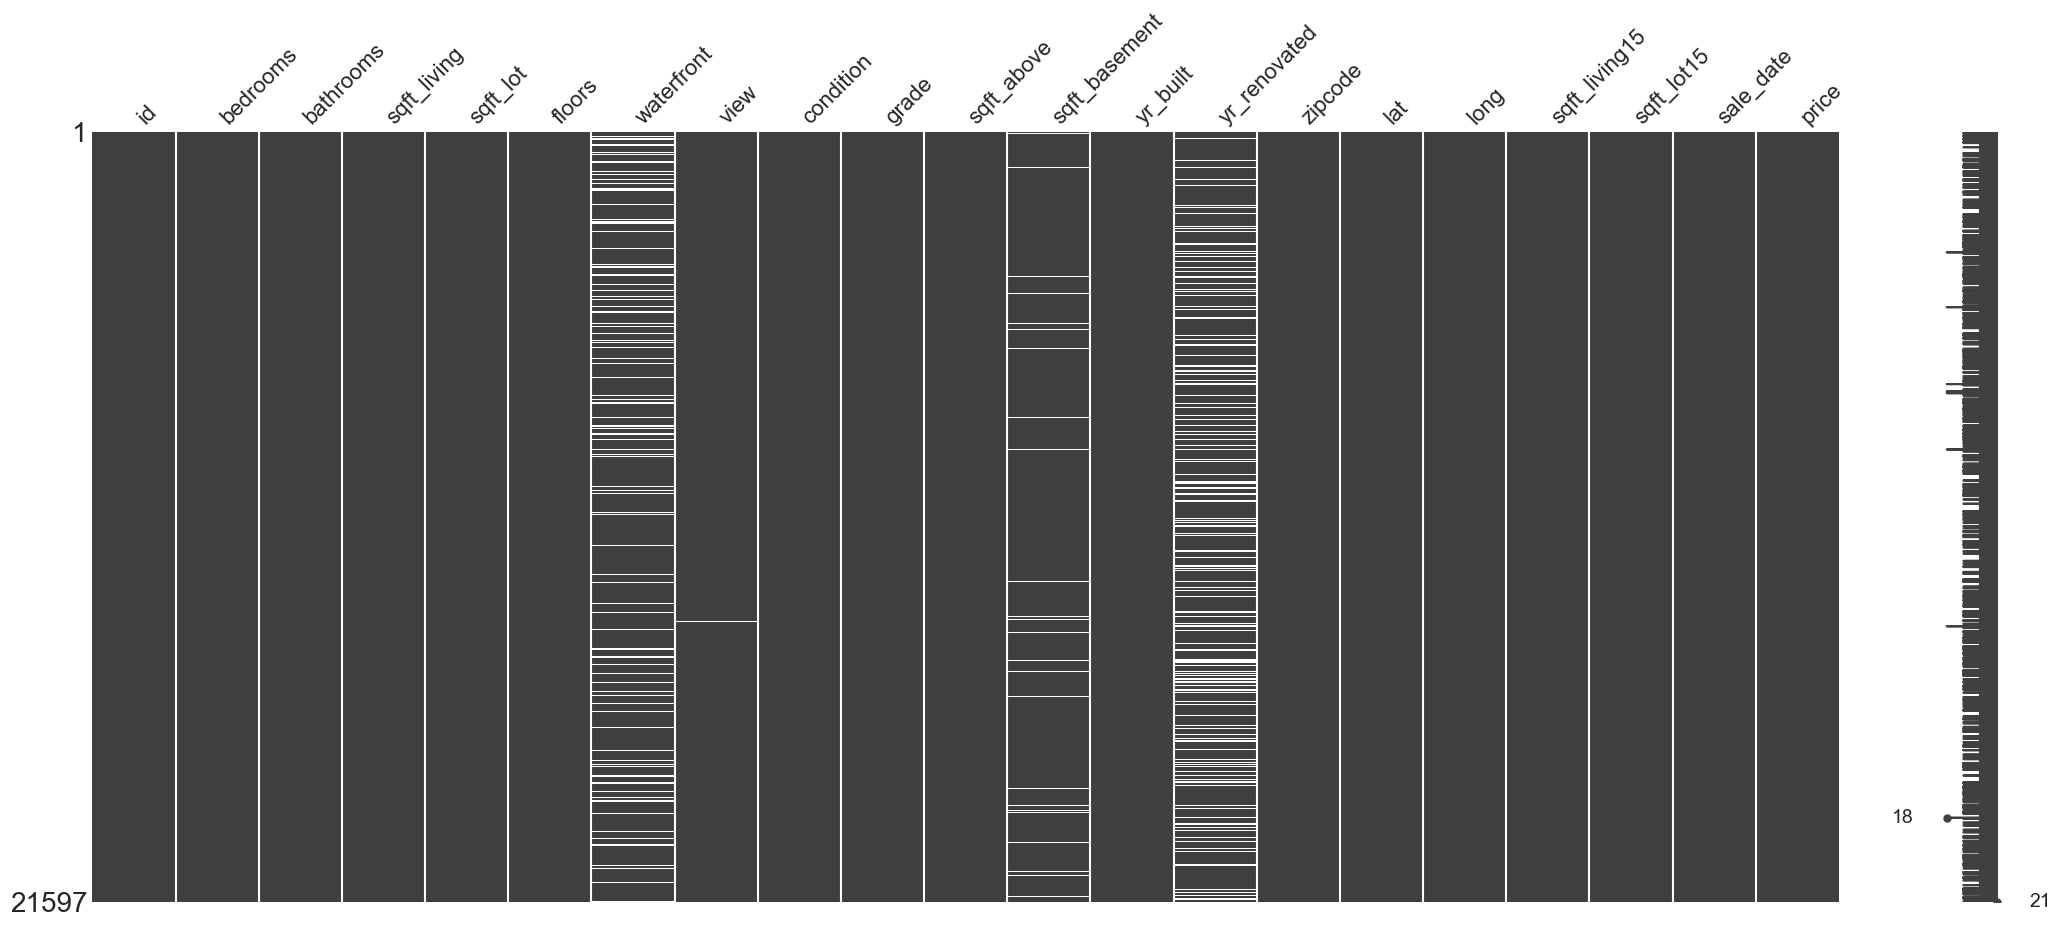

In [1058]:
#visualising missing values
import missingno as msno
msno.matrix(df)

### Data cleaning : Filling or dropping missing values

In [1059]:
#fill missing waterfront data as 0, the median
print(df.waterfront.unique().tolist())
print(df.waterfront.median())
df.waterfront.fillna(df.waterfront.median(), inplace=True)
df.waterfront.unique().tolist()

[nan, 0.0, 1.0]
0.0


[0.0, 1.0]

In [1060]:
#fill missing views as 0, the median
print(df.view.unique().tolist())
print(df.view.median())
df.view.fillna(df.view.median(), inplace=True)
df.view.unique().tolist()

[0.0, nan, 3.0, 4.0, 2.0, 1.0]
0.0


[0.0, 3.0, 4.0, 2.0, 1.0]

In [1061]:
#filling missing values of year renovated as 0
print(df.yr_renovated.unique().tolist())
df.yr_renovated.fillna(0, inplace=True)

#Year renovated seem to have strange values with a 0 appended at the end of each. Cleaning that up
df.yr_renovated = df.yr_renovated.apply(lambda x: int(x / 10) if len(str(x)) > 4 else x)
df.yr_renovated.unique()
df.yr_renovated  = pd.to_datetime(df['yr_renovated'], format='%Y', errors='coerce')


[0.0, 19910.0, nan, 20020.0, 20100.0, 19920.0, 20130.0, 19940.0, 19780.0, 20050.0, 20030.0, 19840.0, 19540.0, 20140.0, 20110.0, 19830.0, 19450.0, 19900.0, 19880.0, 19770.0, 19810.0, 19950.0, 20000.0, 19990.0, 19980.0, 19700.0, 19890.0, 20040.0, 19860.0, 20070.0, 19870.0, 20060.0, 19850.0, 20010.0, 19800.0, 19710.0, 19790.0, 19970.0, 19500.0, 19690.0, 19480.0, 20090.0, 20150.0, 19740.0, 20080.0, 19680.0, 20120.0, 19630.0, 19510.0, 19620.0, 19530.0, 19930.0, 19960.0, 19550.0, 19820.0, 19560.0, 19400.0, 19760.0, 19460.0, 19750.0, 19640.0, 19730.0, 19570.0, 19590.0, 19600.0, 19670.0, 19650.0, 19340.0, 19720.0, 19440.0, 19580.0]


In [1062]:
#drop missing data for sqft_basement
#df["sqft_basement"] = df["sqft_basement"].interpolate(method='linear')
df = df.dropna()
df.shape

(723, 21)

In [1063]:
#correct data types where applicable
#df.info()
columns_to_convert=['waterfront', 'view', 'sqft_living', 'sqft_lot' , 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']
df[columns_to_convert] = df[columns_to_convert].astype(int)


In [1064]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 1 to 20946
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             723 non-null    int64         
 1   bedrooms       723 non-null    float64       
 2   bathrooms      723 non-null    float64       
 3   sqft_living    723 non-null    int64         
 4   sqft_lot       723 non-null    int64         
 5   floors         723 non-null    float64       
 6   waterfront     723 non-null    int64         
 7   view           723 non-null    int64         
 8   condition      723 non-null    int64         
 9   grade          723 non-null    int64         
 10  sqft_above     723 non-null    int64         
 11  sqft_basement  723 non-null    int64         
 12  yr_built       723 non-null    datetime64[ns]
 13  yr_renovated   723 non-null    datetime64[ns]
 14  zipcode        723 non-null    int64         
 15  lat            723 non-nul

### Adding new features to get a better understanding of data

In [1065]:
#new features needed - price per living sq feet, price per lot sq feet, age of house when sold, age of house when sold after renovation (if not renovated then take age since built)
df['price_per_living_sqft'] = df.price / df.sqft_living

df['price_per_lot_sqft'] = df.price / df.sqft_lot

#df['age_built'] = (df.sale_date - df.yr_built).dt.days

#df['age_renovated'] = df.apply(lambda row: row['sale_date'] - row['yr_renovated'] if row['yr_renovated'] != 0 else row['sale_date'] - row['yr_built'], axis=1)
#df.age_renovated = df.age_renovated.dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 1 to 20946
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     723 non-null    int64         
 1   bedrooms               723 non-null    float64       
 2   bathrooms              723 non-null    float64       
 3   sqft_living            723 non-null    int64         
 4   sqft_lot               723 non-null    int64         
 5   floors                 723 non-null    float64       
 6   waterfront             723 non-null    int64         
 7   view                   723 non-null    int64         
 8   condition              723 non-null    int64         
 9   grade                  723 non-null    int64         
 10  sqft_above             723 non-null    int64         
 11  sqft_basement          723 non-null    int64         
 12  yr_built               723 non-null    datetime64[ns]
 13  yr_renov

## Visualizing the data to gain insights
### Checking distributions and correlations between features

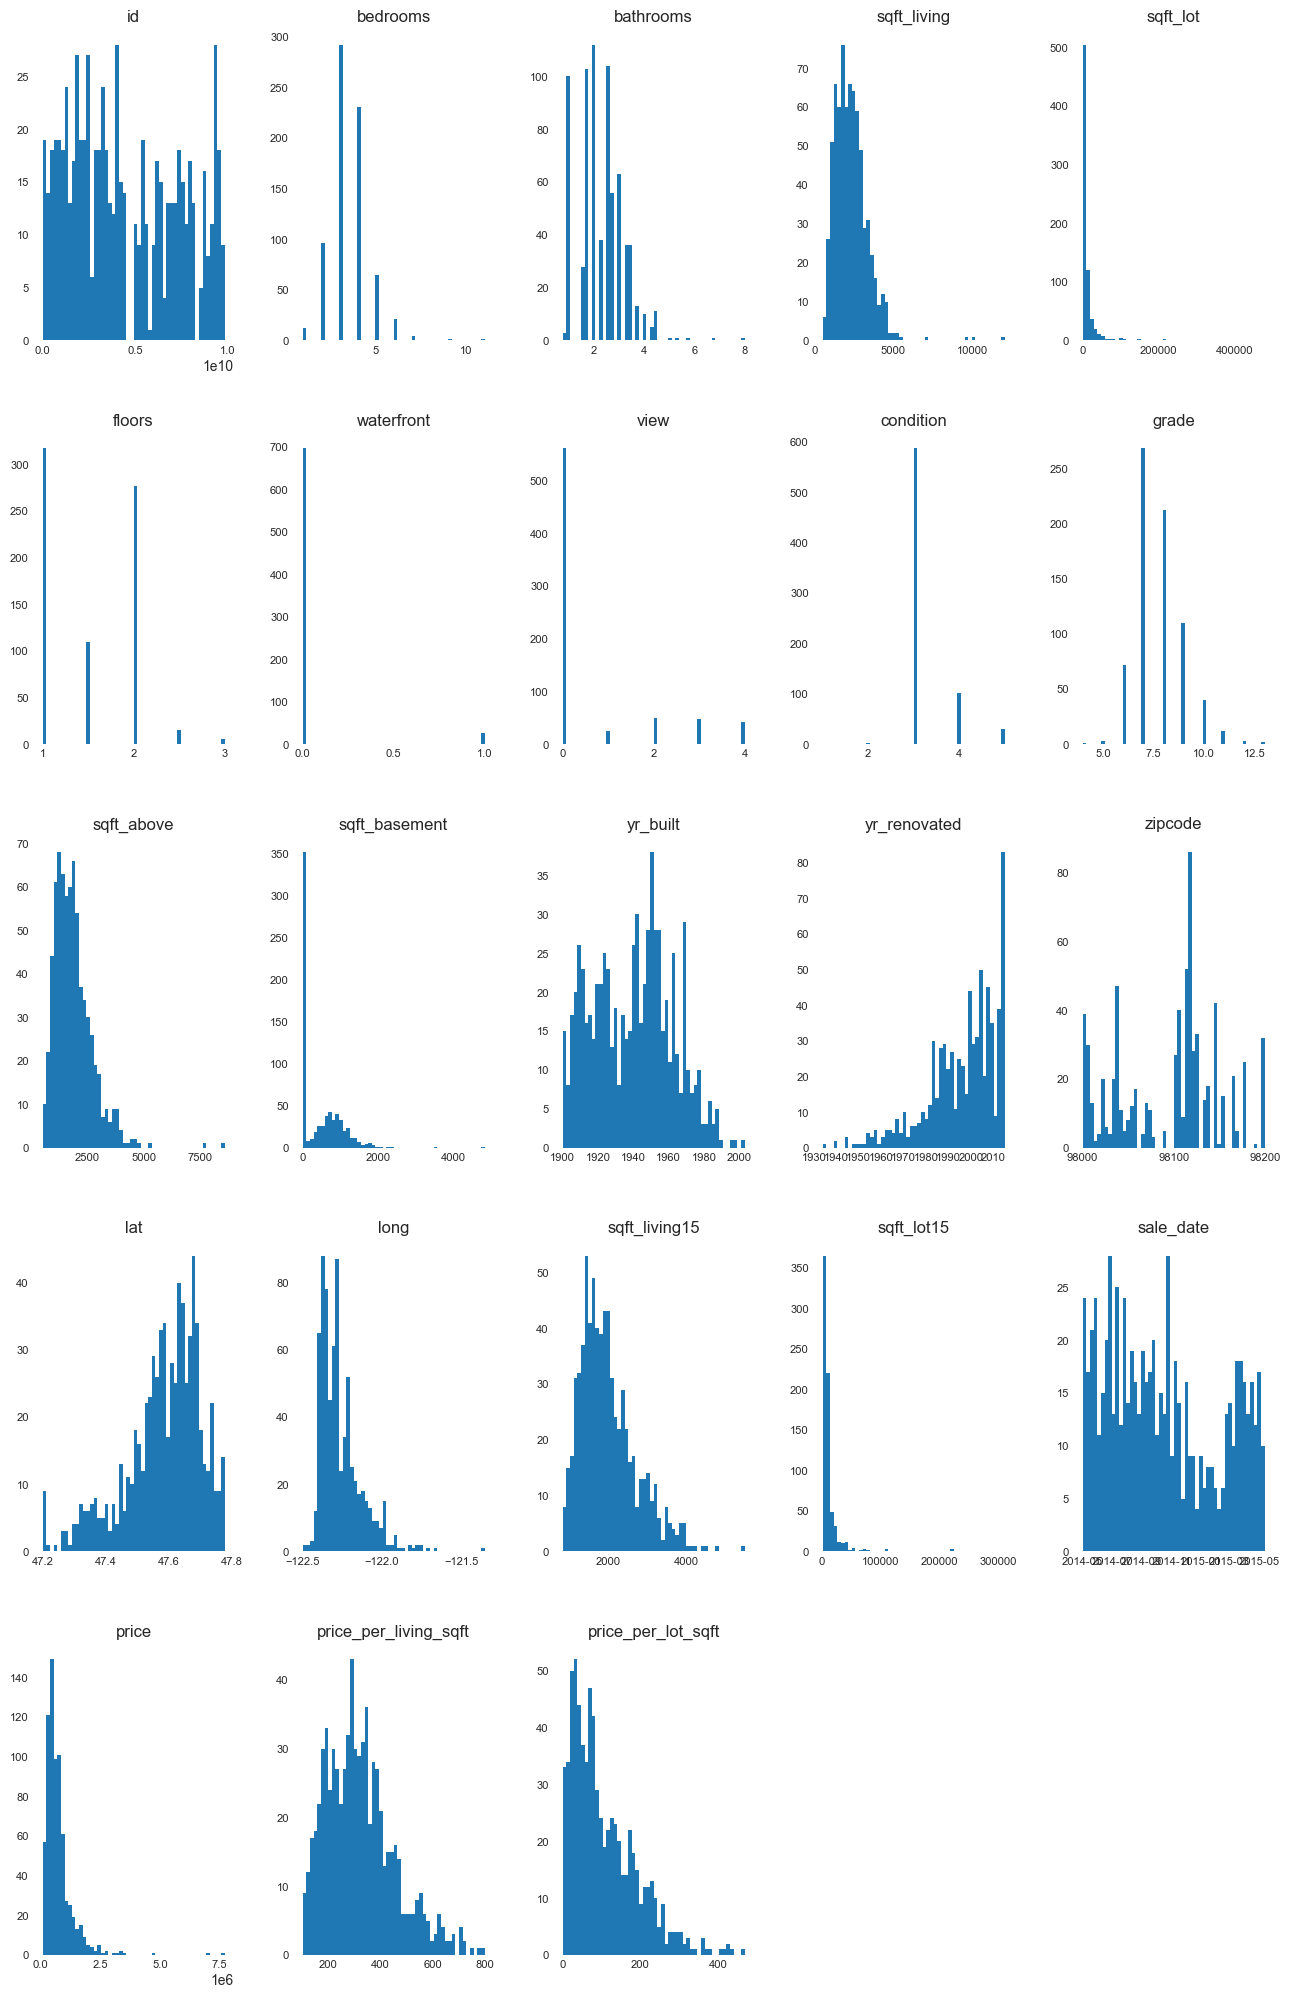

In [1066]:
#checking the distribution of all columns
df.hist(figsize=(16, 25), bins=50, xlabelsize=8, ylabelsize=8); 

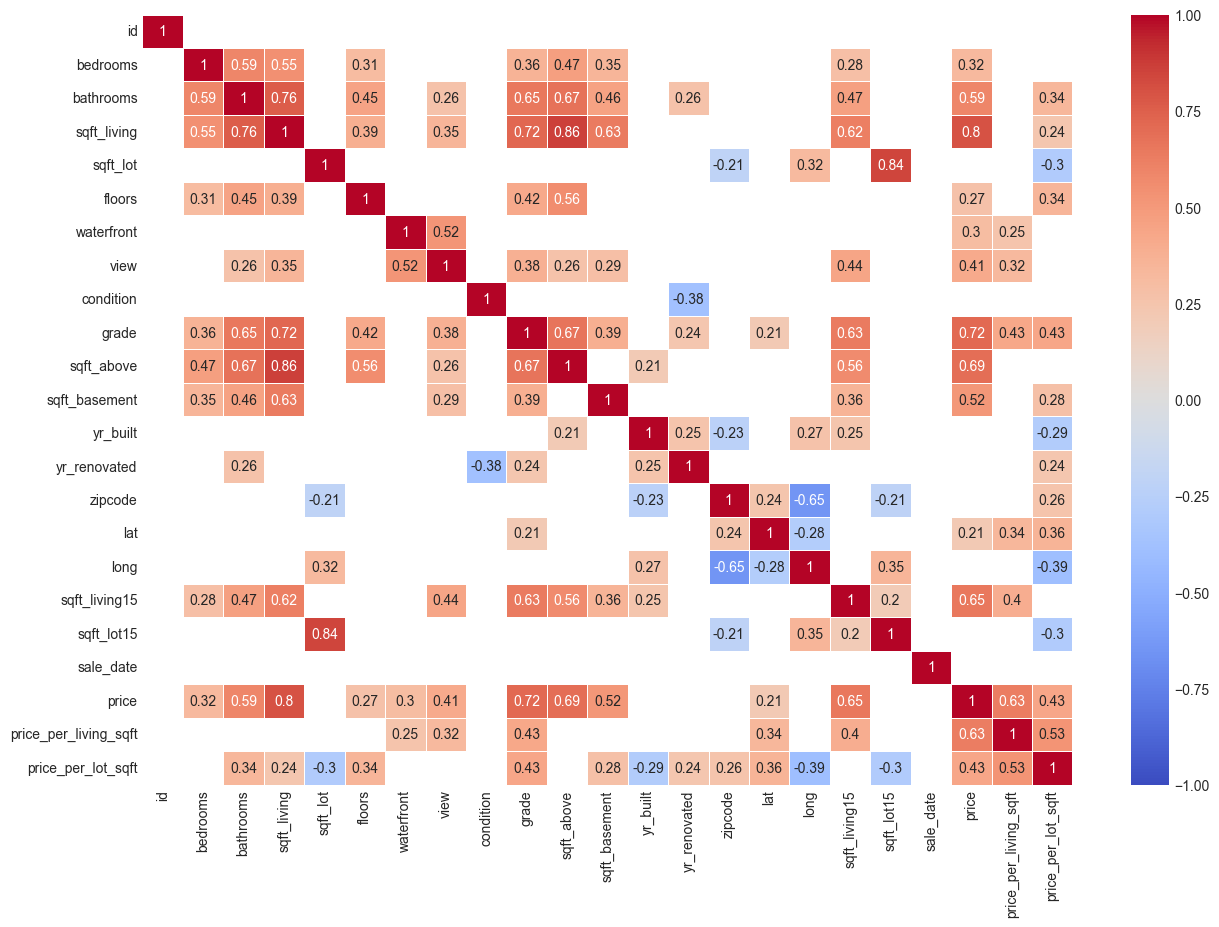

In [1067]:
# Checking correlation of all columns to see the ones that are strongly correlated
corr = df.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr[(np.abs(corr) >= 0.2)],annot=True,linewidths=0.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

### As a realtor, we are interested in sale price of houses, as our commission depends on it. Checking what factors affect sales price the most

In [1068]:
#getting list of strongly correlated values
df_corr = df.corr()['price']
golden_features_price = df_corr[abs(df_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with Sale Price:\n{}".format(len(golden_features_price), golden_features_price))

There is 14 strongly correlated values with Sale Price:
price                   1.000
sqft_living             0.801
grade                   0.717
sqft_above              0.688
sqft_living15           0.649
price_per_living_sqft   0.631
bathrooms               0.593
sqft_basement           0.515
price_per_lot_sqft      0.430
view                    0.410
bedrooms                0.323
waterfront              0.298
floors                  0.270
lat                     0.214
Name: price, dtype: float64


Based on the above results, we see that sqft_living (sum of sqft_above and sqft_basement), grade, sqft_living15, bathrooms affect the sales price the most. Other factors such as view, waterfront, floors,lat (location) also have a poisitive influence on the sales price.

### Let's check if we find any additional factors that influence price per square feet

In [1069]:
#Looking into price per sqft for living area, to get more insights.
df_corr = df.corr()['price_per_living_sqft']
golden_features_price_living = df_corr[abs(df_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with Sale Price Per Living Sqft:\n{}".format(len(golden_features_price_living), golden_features_price_living))

There is 8 strongly correlated values with Sale Price Per Living Sqft:
price_per_living_sqft   1.000
price                   0.631
price_per_lot_sqft      0.529
grade                   0.429
sqft_living15           0.397
lat                     0.339
view                    0.323
waterfront              0.250
Name: price_per_living_sqft, dtype: float64


In [1070]:
#Looking into price per sqft for lot area, to get more insights.
df_corr = df.corr()['price_per_lot_sqft']
golden_features_price_lot = df_corr[abs(df_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice Per Living Sqft:\n{}".format(len(golden_features_price_lot), golden_features_price_lot))

There is 15 strongly correlated values with SalePrice Per Living Sqft:
price_per_lot_sqft       1.000
price_per_living_sqft    0.529
grade                    0.431
price                    0.430
lat                      0.358
floors                   0.345
bathrooms                0.338
sqft_basement            0.280
zipcode                  0.256
sqft_living              0.239
yr_renovated             0.237
yr_built                -0.285
sqft_lot                -0.295
sqft_lot15              -0.296
long                    -0.394
Name: price_per_lot_sqft, dtype: float64


Looking at above results and excluding  feautures that we already have a strong correlation with sales price, we can conclude that lat has a higher correlation to price per sqft, and long has a stronger negative correlation with lot area. Also, interestingly age_built has a positive correlation with price per lot area, while age_renovated has a negative correlation.

### Summarizing important attributes for Sales Price and Sales Price per sqft : 
Strongly Correlated: Area (sqft_living, sqft_above, sqft_basement), Grade, Area of 15 nearest neighbours, Bathrooms

Moderately Correlated: View, Location (Lat, Long (-ve)), Bedrooms , Lot Area (-ve), Year Built (-ve)

Weakly Correlated: Floors, Waterfront, Zipcode, Year Renovated.


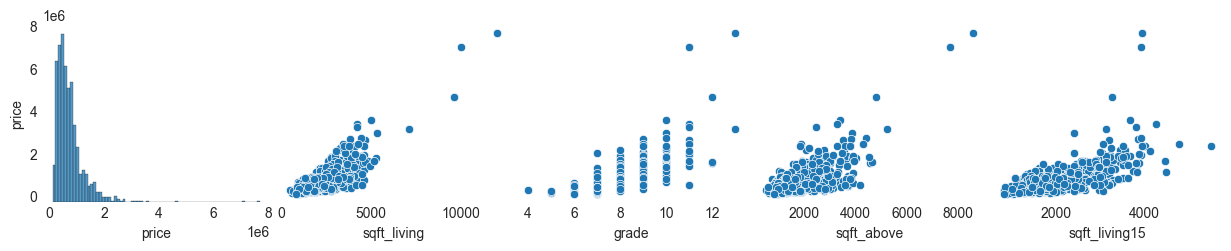

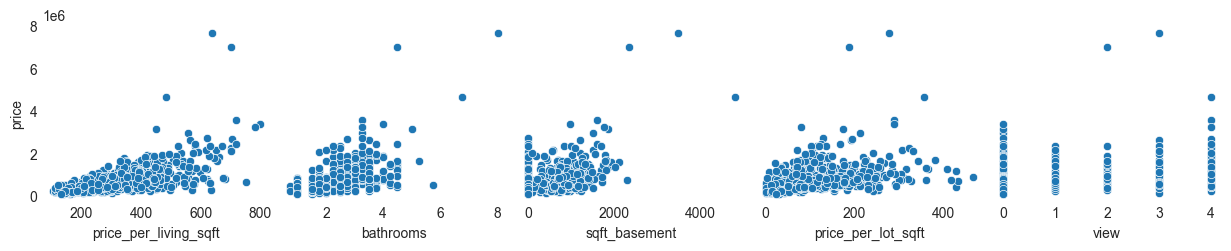

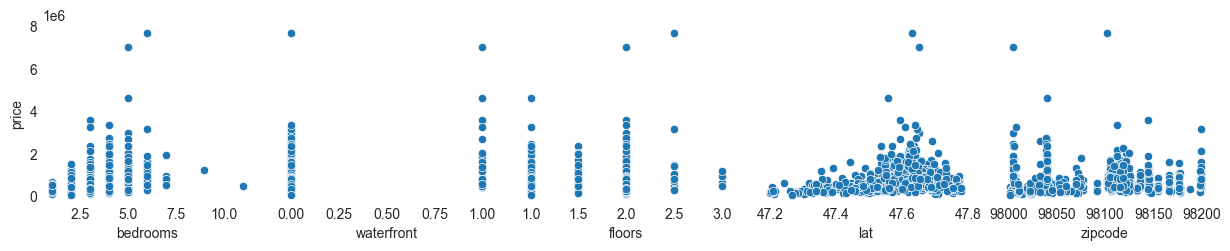

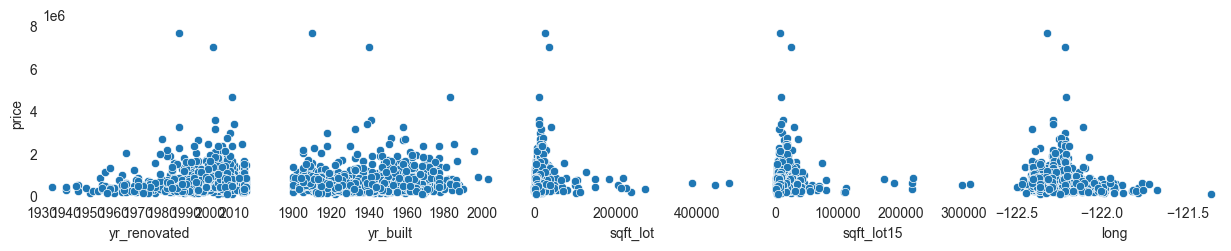

In [1071]:
#Visualising the relationships between the shortlisted attributes representing weak to strong correlation to price and price per sqft
correlated_attributes= pd.concat([golden_features_price, golden_features_price_living, golden_features_price_lot]).index.unique().tolist()
for i in range(0, len(correlated_attributes), 5):
    sns.pairplot(data=df,
                x_vars=correlated_attributes[i:i+5],
                y_vars=['price'])



## Formulating Hypothesis and proving them with insights

### Hypothesis 1 : Larger houses sell at a higher price

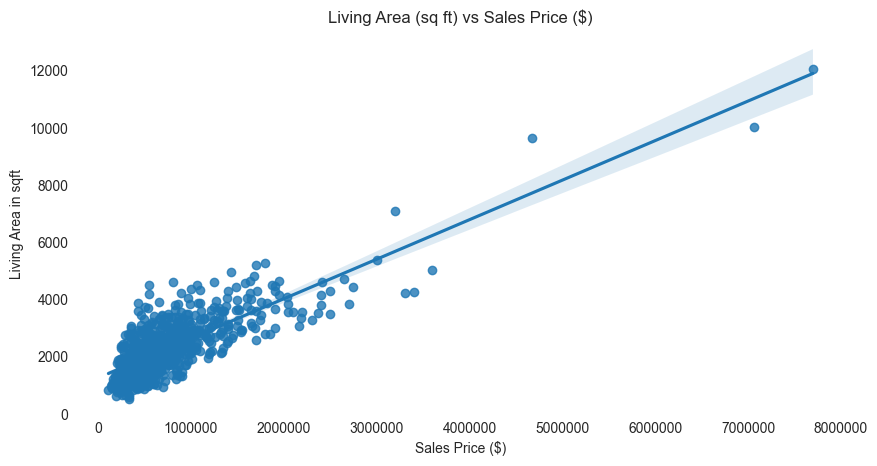

In [1072]:
# visualising as scatterplot
sns.regplot(data=df, x=df.price, y=df.sqft_living);
plt.title('Living Area (sq ft) vs Sales Price ($)')
plt.ylabel('Living Area in sqft')
plt.xlabel('Sales Price ($)')
plt.ticklabel_format(style='plain', axis='x')


We can see the Sales Price and Living Are is positively correlated. In concultions, larger houses sell at a higher price 

### Hypothesis 2 : Better graded apartments sell at a higher price

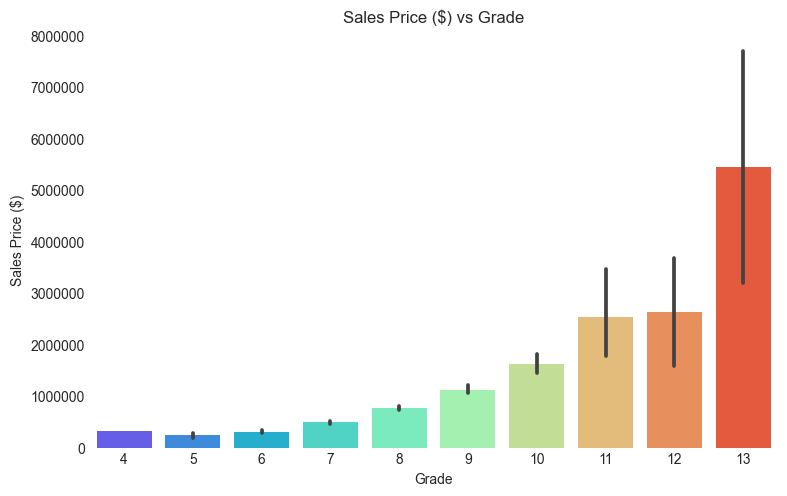

In [1073]:
# visualising as a bar chart
sns.catplot(data=df, x='grade', y='price', kind='bar', palette='rainbow', height = 5, aspect = 1.5);
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales Price ($) vs Grade')
plt.xlabel('Grade')
plt.ylabel('Sales Price ($)')

plt.show()

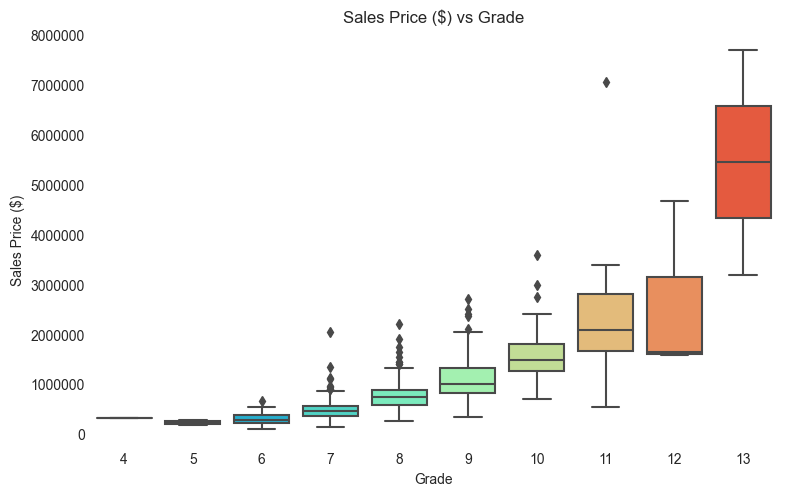

In [1074]:
# visualising as a box plot
sns.catplot(data=df, x='grade', y='price', kind='box', 
              palette='rainbow', height = 5, aspect = 1.5);
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales Price ($) vs Grade')
plt.xlabel('Grade')
plt.ylabel('Sales Price ($)')
plt.show()

We can confirm that the houses with higher grade do fetch a higher Sales Price.

### Hypothesis 3 : Houses located in certain localities are more expensive
Also as the client, Jacob is interested in Golf courses, let's also plot golf courses in the map.

In [1092]:
#Visualing houses using folium map, with price as a color scale. 
map_center = [df['lat'].mean(), df['long'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

#defining color scale
def color_by_price(price):
    if price > df['price'].quantile(0.75):
        return 'red'
    elif price > df['price'].quantile(0.5):
        return 'orange'
    elif price > df.price.quantile(0.25):
        return 'yellow'
    else:
        return 'green'

#list of golf courses in King County
golf_courses = [
    {"name": "Jefferson Park Golf Course", "lat": 47.5805, "long": -122.3112},
    {"name": "West Seattle Golf Course", "lat": 47.5617, "long": -122.3768},
    {"name": "Interbay Golf Center", "lat": 47.6387, "long": -122.3781},
    {"name": "Green Lake Pitch N' Putt", "lat": 47.6762, "long": -122.3337},
    {"name": "Jackson Park Golf Course", "lat": 47.7183, "long": -122.3143},
    {"name": "Sand Point Country Club", "lat": 47.6822, "long": -122.2661}
]

#plotting marker for each house, color corresponding with sale price
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=10,
        color='black',
        fill=True,
        fill_color=color_by_price(row['price']),
        fill_opacity=1,
        tooltip=f"Price : ${row['price']:,}, <br> House ID : {row['id']:,}",  # Display price in popup
        
    ).add_to(mymap)

#plotting golf courses in the map
for course in golf_courses:
    folium.Marker(
        location=[course['lat'], course['long']],
        tooltip=course['name'], 
        icon=folium.Icon(color='black', icon='glyphicon glyphicon-flag'),  # Custom icon for golf courses
    
    ).add_to(mymap)

legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 750px; width: 120px; height: 90px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 ">
     &nbsp; <b>Sales Price ($) </b> <br>
     &nbsp; <svg height="20" width="20"><circle cx="10" cy="10" r="8" fill="red" /></svg> > 75% &nbsp; <br>
     &nbsp; <svg height="20" width="20"><circle cx="10" cy="10" r="8" fill="orange" /></svg> > 50% &nbsp; <br>
     &nbsp; <svg height="20" width="20"><circle cx="10" cy="10" r="8" fill="yellow" /></svg> > 25% &nbsp; <br>
     &nbsp; <svg height="20" width="20"><circle cx="10" cy="10" r="8" fill="green" /></svg> > 0% &nbsp; <br>
      </div>
     """

# Add custom legend HTML to the map
mymap.get_root().html.add_child(folium.Element(legend_html))

display(mymap)

We can see that the most of expensive houses are in Central and North-West Seattle, and are also the most dense neighborhoods. On the other hand, the houses are cheaper towards the south. We can conclude that Houses located in certain localities are more expensive

## Finding some interesting houses for our client
### Client definition :  Jacob Phillips 
Jocob is a buyer with an Unlimited Budget. He wants 4+ bathrooms or smaller house nearby. 
He wants big lot (tennis court & pool), golf, historic, no waterfront

### Assumption 1 : Smaller House Nearby
Let's define Smaller House on the basis of living area

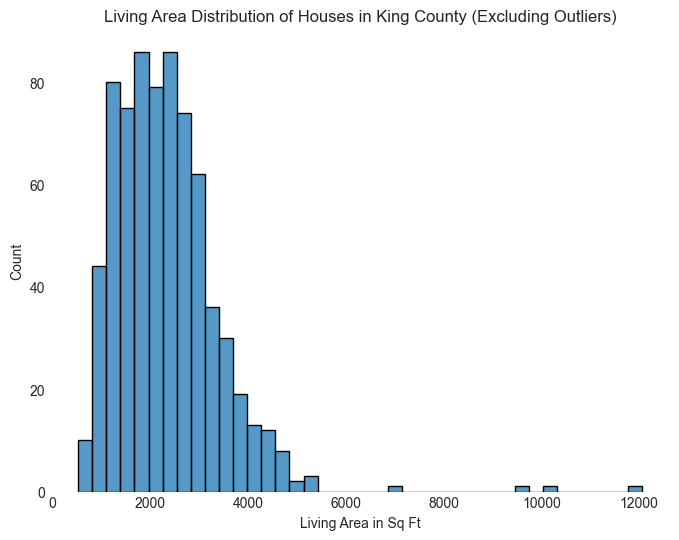

count     723.000
mean     2323.692
std      1079.850
min       520.000
25%      1555.000
50%      2200.000
75%      2875.000
max     12050.000
Name: sqft_living, dtype: float64

In [1076]:
# Plot histogram 
plt.figure(figsize=(8, 6))
sns.histplot(x="sqft_living", data=df)
plt.xlabel("Living Area in Sq Ft")
plt.title("Living Area Distribution of Houses in King County (Excluding Outliers)")
plt.show()

df.sqft_living.describe()

Smaller house is relative to the houses with 4+ bathrooms. Looking at the histogram, I would define smaller houses as the houses with living area below the 3rd quartile, or 2875 in this case.

### Assumption 2 : Big Lot
Let's define Big Lot

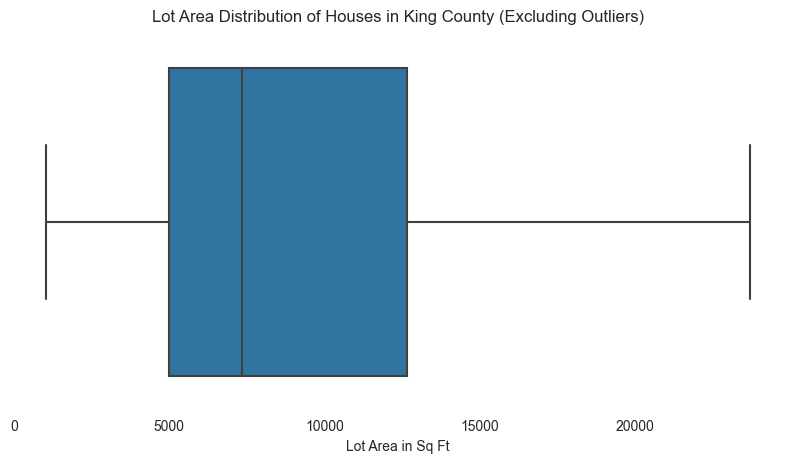

count      723.000
mean     16024.542
std      38006.457
min       1024.000
25%       5000.000
50%       7350.000
75%      12672.500
max     478288.000
Name: sqft_lot, dtype: float64

In [1077]:
#As the client needs a big lot, let's look at distribution of Lot Area of houses, to define big lots
sns.boxplot(x="sqft_lot", data=df, showfliers=False)
plt.xlabel("Lot Area in Sq Ft")
plt.title("Lot Area Distribution of Houses in King County (Excluding Outliers)")
plt.show()

df.sqft_lot.describe()

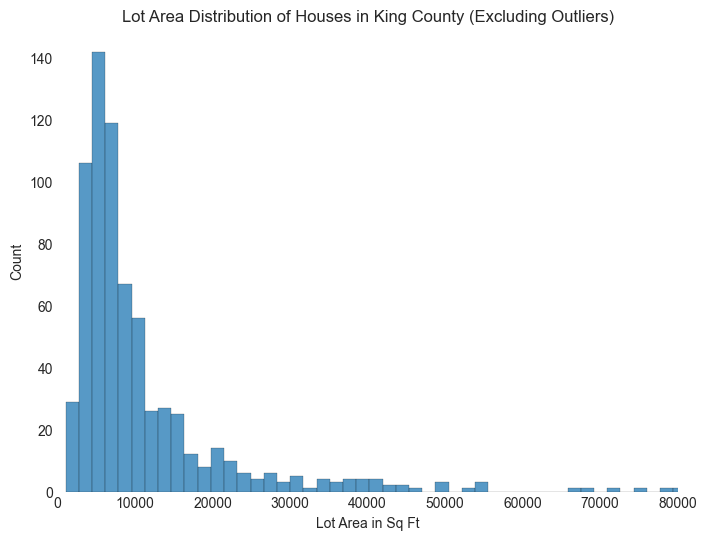

In [1078]:
# Plot histogram with quartile boundaries
plt.figure(figsize=(8, 6))
sns.histplot(x="sqft_lot", data=df)
plt.xlabel("Lot Area in Sq Ft")
plt.title("Lot Area Distribution of Houses in King County (Excluding Outliers)")
plt.xlim(0, 80000)
plt.show()

We can see that most houses have a lot area less that 7350 sq ft. 
Looking at the distribution I would define houses with bigger lot area as the houses above the 50% quartile, in this case above 7350 sq ft.

### Assumption 3 : Historic House
As historic houses are atleast 50 years old, I have defined historic houses as the ones built after 1970

In [1079]:
#Let's filter the dataset with the requirements of jacob for bathrooms, waterfront, historic, big lot area
df_jacob = df.query('(bathrooms >= 4 or sqft_living<= 2875)and waterfront == 0 and yr_built <= \'1970-01-01\' and sqft_lot >= 7350')
print(df_jacob.shape)

(213, 23)


### Assumption 4 : For defining if house is near Golf Course, as houses within 3 miles of nearest Golf Course
Below, I calculate the distance to the nearest golf course and filter the data set for houses that are closest.

In [1080]:
#list of golf courses in Kin County
golf_courses = [
    {"name": "Jefferson Park Golf Course", "lat": 47.5805, "long": -122.3112},
    {"name": "West Seattle Golf Course", "lat": 47.5617, "long": -122.3768},
    {"name": "Interbay Golf Center", "lat": 47.6387, "long": -122.3781},
    {"name": "Green Lake Pitch N' Putt", "lat": 47.6762, "long": -122.3337},
    {"name": "Jackson Park Golf Course", "lat": 47.7183, "long": -122.3143},
    {"name": "Sand Point Country Club", "lat": 47.6822, "long": -122.2661}
]
golf_courses_df = pd.DataFrame.from_dict(golf_courses)

# Function to calculate distance between two sets of coordinates using Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate differences in latitude and longitude
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula to calculate distance
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate distance in kilometers
    distance_miles= R * c * 0.621371

    return distance_miles

# Specify distance threshold in miles
distance_threshold_miles = 3.0

def calculate_golf_distance(df, golf_courses_df):
    # Iterate over each house in the DataFrame
    for idx, house_row in df.iterrows():
        house_latitude = house_row['lat']
        house_longitude = house_row['long']

        # Initialize variables for minimum distance calculation
        min_distance = float('inf')
        nearest_golf_course = None

        # Iterate over each golf course
        for _, golf_row in golf_courses_df.iterrows():
            golf_latitude = golf_row['lat']
            golf_longitude = golf_row['long']

            # Calculate distance between house and golf course
            distance_miles = calculate_distance(house_latitude, house_longitude, golf_latitude, golf_longitude)

            # Update minimum distance and nearest golf course if closer
            if distance_miles < min_distance:
                min_distance = distance_miles
                nearest_golf_course = golf_row['name']

        # Add minimum distance and nearest golf course to the DataFrame
        df_jacob.at[idx, 'nearest_golf_course'] = nearest_golf_course
        df_jacob.at[idx, 'golf_distance_miles'] = min_distance

# Filter houses near golf courses using the defined function
calculate_golf_distance(df_jacob, golf_courses_df)
df_jacob = df_jacob.query('golf_distance_miles <= @distance_threshold_miles')

df_jacob.shape

(37, 25)

### New Feature : Commission
 As a Realtor, my goal is to get the most commission for a suitable house for my client. Assuming, I would make 6% commission on the sale price, let's look at how much commission I can expect from each house.

In [1081]:
df_jacob['commission'] = (df.price*0.06).astype('int')

In [1082]:
#let's table a look at the houses that remain, sorted by my commission 

df_jacob[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated','price','golf_distance_miles', 'commission']].sort_values('commission', ascending=0).head(20)


,id,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,price,golf_distance_miles,commission
7245,6762700020,6.000,8.000,12050,27600,3,4,13,1910-01-01,1987-01-01,7700000,2.638,462000
7900,1068000375,6.000,5.000,7100,18200,0,3,13,1933-01-01,2002-01-01,3200000,1.419,192000
19134,7935000450,3.000,2.250,2480,15022,4,3,9,1967-01-01,2003-01-01,1050000,1.220,63000
11767,7740100260,3.000,2.500,2850,11535,1,3,8,1952-01-01,2008-01-01,900000,2.388,54000
10080,4319200060,3.000,2.000,2783,11177,0,3,8,1910-01-01,1999-01-01,840000,1.644,50400
9385,5100403876,3.000,2.500,2060,9715,0,3,8,1924-01-01,2006-01-01,840000,1.536,50400
2982,4003000053,3.000,2.750,2250,9600,0,4,9,1909-01-01,1991-01-01,765000,1.937,45900
14870,4055700920,2.000,2.000,2180,21392,0,3,8,1934-01-01,1979-01-01,750000,2.528,45000
2435,9244900248,3.000,1.750,2320,10900,0,3,7,1935-01-01,1974-01-01,737500,0.873,44250
5067,2484200080,3.000,2.500,2060,8778,0,3,8,1953-01-01,2010-01-01,731100,2.592,43866


### Filter for high commission opportunities
 As my client has unlimited budget, I have a good opportunity to make huge commission. Hence, I have decided to show my client only the houses where I would get atleast $50,000 commission


In [1083]:
df_jacob = df_jacob.query('commission>50000').sort_values('commission', ascending=0)
df_jacob = df_jacob.reset_index(drop=True)

df_jacob[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated','price','golf_distance_miles', 'commission']].head(20)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,price,golf_distance_miles,commission
0,6762700020,6.000,8.000,12050,27600,3,4,13,1910-01-01,1987-01-01,7700000,2.638,462000
1,1068000375,6.000,5.000,7100,18200,0,3,13,1933-01-01,2002-01-01,3200000,1.419,192000
2,7935000450,3.000,2.250,2480,15022,4,3,9,1967-01-01,2003-01-01,1050000,1.220,63000
3,7740100260,3.000,2.500,2850,11535,1,3,8,1952-01-01,2008-01-01,900000,2.388,54000
4,5100403876,3.000,2.500,2060,9715,0,3,8,1924-01-01,2006-01-01,840000,1.536,50400
5,4319200060,3.000,2.000,2783,11177,0,3,8,1910-01-01,1999-01-01,840000,1.644,50400


### Visualising final recommendations. These are the 6 houses I would recommend to my client.

In [1095]:

map_center = [df_jacob['lat'].mean(), df_jacob['long'].mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

for index, row in df_jacob.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=10,
        color='black',
        fill=True,
        fill_color=color_by_price(row['price']),
        fill_opacity=1,
        tooltip=f"ID : {row['id']:,},<br> Price : ${row['price']:,}, <br> {row['bedrooms']:,} beds, {row['bathrooms']:,} baths, <br> {row['sqft_living']:,} living area, {row['sqft_lot']:,} lot area,  <br> grade : {row['grade']:,}, <br> condition : {row['condition']:,}, <br> Distance to Golf : {row['golf_distance_miles']:.1f}, ",  
        
    ).add_to(mymap)
    folium.Marker(
        location=[row['lat'], row['long']],
        icon=folium.DivIcon(html=f"<div style='font-size: 16pt; color: blue;; margin-top: 20px;'>{index+1}</div>")        
    ).add_to(mymap)

for course in golf_courses:
    folium.Marker(
        location=[course['lat'], course['long']],
        tooltip=course['name'], 
        icon=folium.Icon(color='black', icon='glyphicon glyphicon-flag'),  # Custom icon for golf courses
    
    ).add_to(mymap)

legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 750px; width: 120px; height: 90px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 ">
     &nbsp; <b>Sales Price ($) </b> <br>
     &nbsp; <svg height="20" width="20"><circle cx="10" cy="10" r="8" fill="red" /></svg> > 75% &nbsp; <br>
     &nbsp; <svg height="20" width="20"><circle cx="10" cy="10" r="8" fill="orange" /></svg> > 50% &nbsp; <br>
     &nbsp; <svg height="20" width="20"><circle cx="10" cy="10" r="8" fill="yellow" /></svg> > 25% &nbsp; <br>
     &nbsp; <svg height="20" width="20"><circle cx="10" cy="10" r="8" fill="green" /></svg> > 0% &nbsp; <br>
      </div>
     """

# Add custom legend HTML to the map
mymap.get_root().html.add_child(folium.Element(legend_html))

display(mymap)